<center>
<img src="https://habrastorage.org/webt/ia/m9/zk/iam9zkyzqebnf_okxipihkgjwnw.jpeg">
    
## [mlcourse.ai](mlcourse.ai) – Open Machine Learning Course 

Author: [Yury Kashnitskiy](https://yorko.github.io). 
Translated and edited by [Maxim Keremet](https://www.linkedin.com/in/maximkeremet/), [Artem Trunov](https://www.linkedin.com/in/datamove/), and [Aditya Soni](https://www.linkedin.com/in/aditya-soni-0505a9124/). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.

# <center> Assignment #2. <br> Visual data analysis in Python: EDA of US flights <br> (using Pandas, Matplotlib & Seaborn & Plotly)

<img src='../../img/flight.png' width=50%>


* **Your task** is to write code and perform computations in the cells below

* **Deadline for A2**: 2020 April 07, 23:59 PM

In [0]:
!pip install plotly

In [0]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import plotly.graph_objs as go
import plotly.express as px

* Download the data [archive](http://www.rdatasciencecases.org/Data/Airline/2008.csv.bz2) (Archived ~ 114 Mb, unzipped - ~ 690 Mb). No need to unzip - pandas can unbzip on the fly.
* Place it in the "../../data" folder, or change the path below according to your location.
* The dataset has information about carriers and flights between US airports during the year 2008. 
* Column description is available [here](http://www.transtats.bts.gov/Fields.asp?Table_ID=236). Visit this site to find ex. meaning of flight cancellation codes.

**Reading data into memory and creating a Pandas _DataFrame_ object**

(This may take a while, be patient)

We are not going to read in the whole dataset. In order to reduce memory footprint, we instead load only needed columns and cast them suitable data types.

In [0]:
dtype = {'DayOfWeek': np.uint8, 'DayofMonth': np.uint8, 'Month': np.uint8 , 'Cancelled': np.uint8, 
         'Year': np.uint16, 'FlightNum': np.uint16 , 'Distance': np.uint16, 
         'UniqueCarrier': str, 'CancellationCode': str, 'Origin': str, 'Dest': str,
         'ArrDelay': np.float16, 'DepDelay': np.float16, 'CarrierDelay': np.float16,
         'WeatherDelay': np.float16, 'NASDelay': np.float16, 'SecurityDelay': np.float16,
         'LateAircraftDelay': np.float16, 'DepTime': np.float16}

In [0]:
%%time
# change the path if needed
path = './2008.csv.bz2'
flights_df = pd.read_csv(path, usecols=dtype.keys(), dtype=dtype)

CPU times: user 38.9 s, sys: 1.07 s, total: 40 s
Wall time: 40 s


In [0]:
flights_df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,WN,335,-14.0,8.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,WN,3231,2.0,19.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,WN,448,14.0,8.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,WN,1746,-6.0,-4.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,WN,3920,34.0,34.0,IND,BWI,515,0,NaN,2.0,0.0,0.0,0.0,32.0


**Check the number of rows and columns and print column names.**

In [0]:
print(flights_df.shape)
print(flights_df.columns)

(7009728, 19)
Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'UniqueCarrier',
       'FlightNum', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance',
       'Cancelled', 'CancellationCode', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')


**Print first 5 rows of the dataset.**

In [0]:
flights_df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,WN,335,-14.0,8.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,WN,3231,2.0,19.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,WN,448,14.0,8.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,WN,1746,-6.0,-4.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,WN,3920,34.0,34.0,IND,BWI,515,0,NaN,2.0,0.0,0.0,0.0,32.0


**Transpose the frame to see all features at once.**

In [0]:
flights_df.head().T

,0,1,2,3,4
Year,2008,2008,2008,2008,2008
Month,1,1,1,1,1
DayofMonth,3,3,3,3,3
DayOfWeek,4,4,4,4,4
DepTime,2003,754,628,926,1829
UniqueCarrier,WN,WN,WN,WN,WN
FlightNum,335,3231,448,1746,3920
ArrDelay,-14,2,14,-6,34
DepDelay,8,19,8,-4,34
Origin,IAD,IAD,IND,IND,IND


**Examine data types of all features and total dataframe size in memory.**

In [0]:
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 19 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               uint16 
 1   Month              uint8  
 2   DayofMonth         uint8  
 3   DayOfWeek          uint8  
 4   DepTime            float16
 5   UniqueCarrier      object 
 6   FlightNum          uint16 
 7   ArrDelay           float16
 8   DepDelay           float16
 9   Origin             object 
 10  Dest               object 
 11  Distance           uint16 
 12  Cancelled          uint8  
 13  CancellationCode   object 
 14  CarrierDelay       float16
 15  WeatherDelay       float16
 16  NASDelay           float16
 17  SecurityDelay      float16
 18  LateAircraftDelay  float16
dtypes: float16(8), object(4), uint16(3), uint8(4)
memory usage: 387.7+ MB


**Get basic statistics of each feature.**

In [0]:
flights_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7009728.0,2008.000000,0.000000,2008.0,2008.0,2008.0,2008.0,2008.0
Month,7009728.0,6.375130,3.406737,1.0,3.0,6.0,9.0,12.0
DayofMonth,7009728.0,15.728015,8.797068,1.0,8.0,16.0,23.0,31.0
DayOfWeek,7009728.0,3.924182,1.988259,1.0,2.0,4.0,6.0,7.0
DepTime,6873482.0,NaN,NaN,1.0,928.0,1325.0,1728.0,2400.0
FlightNum,7009728.0,2224.200105,1961.715999,1.0,622.0,1571.0,3518.0,9743.0
ArrDelay,6855029.0,NaN,NaN,-519.0,-10.0,-2.0,12.0,2460.0
DepDelay,6873482.0,NaN,NaN,-534.0,-4.0,-1.0,8.0,2468.0
Distance,7009728.0,726.387029,562.101803,11.0,325.0,581.0,954.0,4962.0
Cancelled,7009728.0,0.019606,0.138643,0.0,0.0,0.0,0.0,1.0


**Count unique Carriers and plot their relative share of flights:**

In [0]:
flights_df['UniqueCarrier'].nunique()

20

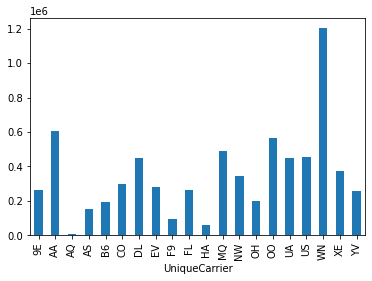

In [0]:
flights_df.groupby('UniqueCarrier').size().plot(kind='bar');

**We can also _group by_ category/categories in order to calculate different aggregated statistics.**

**For example, finding top-3 flight codes, that have the largest total distance travelled in year 2008.**

In [0]:
flights_df.groupby(['UniqueCarrier','FlightNum'])['Distance'].sum().sort_values(ascending=False).iloc[:3]

UniqueCarrier  FlightNum
CO             15           1796244.0
               14           1796244.0
UA             52           1789722.0
Name: Distance, dtype: float64

**Another way:**

In [0]:
flights_df.groupby(['UniqueCarrier','FlightNum'])\
  .agg({'Distance': [np.mean, np.sum, 'count'],
        'Cancelled': np.sum})\
  .sort_values(('Distance', 'sum'), ascending=False)\
  .iloc[0:3]

Distance                  Cancelled
                                mean        sum count       sum
UniqueCarrier FlightNum                                        
CO            15         4962.000000  1796244.0   362         0
              14         4962.000000  1796244.0   362         0
UA            52         2465.181818  1789722.0   726         8

**Number of flights by days of week and months:**

In [0]:
pd.crosstab(flights_df.Month, flights_df.DayOfWeek)

DayOfWeek,1,2,3,4,5,6,7
Month,,,,,,,
1,80807,97298,100080,102043,81940,67178,76419
2,81504,79700,80587,82158,102726,66462,76099
3,103210,81159,82307,82831,82936,86153,97494
4,82463,100785,102586,82799,82964,68304,78225
5,80626,79884,81264,102572,102878,84493,74576
6,104168,82160,82902,83617,83930,72322,99566
7,84095,103429,103315,105035,79349,72219,80489
8,82983,80895,81773,82625,103878,86155,93970
9,94300,91533,74057,75589,75881,58343,71205


**It can also be handy to color such tables in order to easily notice outliers:**

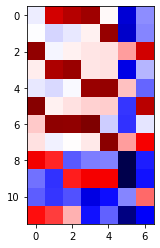

In [0]:
plt.imshow(pd.crosstab(flights_df.Month, flights_df.DayOfWeek),
           cmap='seismic', interpolation='none');

**Flight distance histogram:**

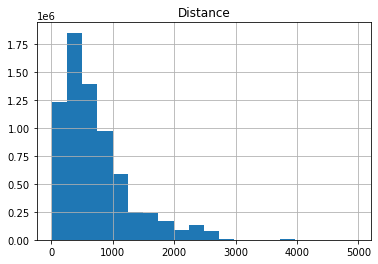

In [0]:
flights_df.hist('Distance', bins=20);

**Making a histogram of flight frequency by date.**

In [0]:
flights_df['Date'] = pd.to_datetime(flights_df.rename(columns={'DayofMonth': 'Day'})[['Year', 'Month', 'Day']])

In [0]:
num_flights_by_date = flights_df.groupby('Date').size()

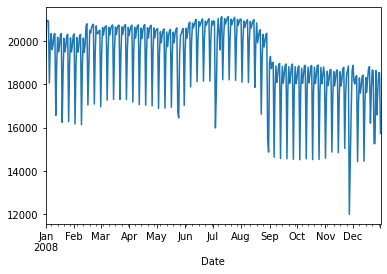

In [0]:
num_flights_by_date.plot();

**Do you see a weekly pattern above? And below?**

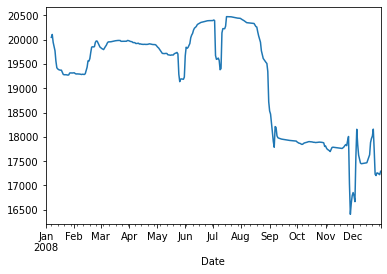

In [0]:
num_flights_by_date.rolling(window=7).mean().plot();

**1. Find top-10 carriers in terms of the number of completed flights (_UniqueCarrier_ column)?**

**Which of the listed below is _not_ in your top-10 list?**
- DL
- AA
- OO
- EV 

In [0]:
# You code here
'''
ANSWER: EV is not in the list
'''
flights_df[flights_df["Cancelled"]==0].groupby(["UniqueCarrier"]).size().sort_values(ascending=False).head(10)

UniqueCarrier
WN    1189365
AA     587445
OO     554723
MQ     472362
US     447007
DL     445118
UA     438974
XE     364518
NW     344746
CO     294753
dtype: int64

**2. Plot distributions of flight cancellation reasons (_CancellationCode_).**

**What is the most frequent reason for flight cancellation? (Use this [link](https://www.transtats.bts.gov/Fields.asp?Table_ID=236) to translate codes into reasons)**
- carrier
- weather conditions 
- National Air System
- security reasons

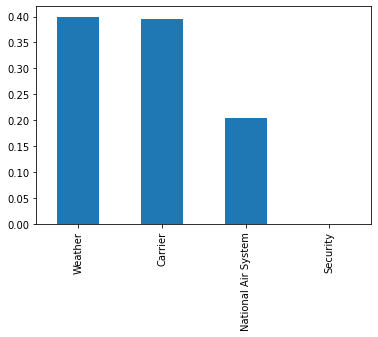

In [0]:
# You code here
codes={"A":"Carrier","B":"Weather","C":"National Air System","D":"Security"}

flights_df["CancellationCode"].map(codes).value_counts(normalize=True).plot(kind='bar')

**3. Which route is the most frequent, in terms of the number of flights?**

(Take a look at _'Origin'_ and _'Dest'_ features. Consider _A->B_ and _B->A_ directions as _different_ routes) 

 - New-York – Washington
 - San-Francisco – Los-Angeles 
 - San-Jose – Dallas
 - New-York – San-Francisco

In [0]:
# You code here
'''
ANSWER: most frequent route is San Francisco to Los Angeles
'''
flights_df.head()
# flights_df[["Origin","Dest"]].isnull().sum()
flights_df["Routes"]=flights_df["Origin"] + " -> " +flights_df["Dest"]
flights_df["Routes"].value_counts().head() 

SFO -> LAX    13788
LAX -> SFO    13390
OGG -> HNL    12383
LGA -> BOS    12035
BOS -> LGA    12029
Name: Routes, dtype: int64

**4. Find top-5 delayed routes (count how many times they were delayed on departure). From all flights on these 5 routes, count all flights with weather conditions contributing to a delay.**

**Hint:** consider only positive delays


- 449 
- 539 
- 549 
- 668+

In [0]:
# You code here
'''
ANSWER: 'LAX -> SFO', 'DAL -> HOU', 'SFO -> LAX', 'ORD -> LGA', 'HOU -> DAL'
'''
# flights_df[flights_df["DepDelay"]>0]["Routes"].value_counts().head(5)#.index
def wdelay(series):
  return len(series[series>0])

flights_df[flights_df["DepDelay"]>0].fillna(0).groupby("Routes")\
                                                .agg({"FlightNum":"count","WeatherDelay":wdelay})\
                                                .sort_values(["FlightNum"],ascending=False).head(5)\
                                                .rename(columns={"FlightNum":"TotalDelays"})

,TotalDelays,WeatherDelay
Routes,,
LAX -> SFO,6253,109.0
DAL -> HOU,5742,133.0
SFO -> LAX,5322,31.0
ORD -> LGA,5311,266.0
HOU -> DAL,5288,129.0


**5. Examine the hourly distribution of departure times. For that, create a new series from DepTime, removing missing values.**

**Choose all correct statements:**
 - Flights are normally distributed within time interval [0-23] (Search for: Normal distribution, bell curve).
 - Flights are uniformly distributed within time interval [0-23].
 - In the period from 0 am to 4 am there are considerably less flights than from 7 pm to 8 pm.

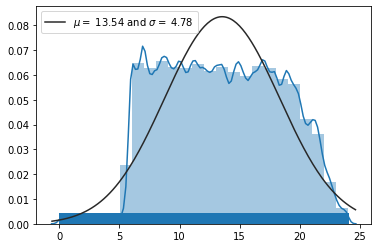

In [121]:
# You code here
'''
ANSWER: 
1. NORMAL DISTRIBUTION: FALSE
2. UNIFORM DISTRIBUTION: TRUE
3. 0-4 AM FLIGHT COUNT < 7-8 PM : TRUE
'''


import seaborn as sns
from scipy.stats import norm
flights_df.DepTime.describe()
deptimes=flights_df[flights_df["DepTime"].notnull()][["DepTime"]]
deptimes["DepTime"]=deptimes["DepTime"].apply(lambda x: '{0:04d}'.format(int(x)))
deptimes["hour"]=deptimes["DepTime"].apply(lambda x: int(x[:2]))
deptimes["mins"]=deptimes["DepTime"].apply(lambda x:   int(x[2:])/60*100    )
deptimes.loc[deptimes["hour"]==24,"hour"]=23
deptimes["TimeAdjusted"]=deptimes["hour"]*100 + deptimes["mins"]
deptimes.head()


plt.figure()
sns.distplot(deptimes["TimeAdjusted"].values/100, kde=True, rug=True,fit=norm,bins=24)
(mu, sigma) = norm.fit(deptimes["TimeAdjusted"].values/100)
plt.legend(['$\mu=$ {:.2f} and $\sigma=$ {:.2f}'.format(mu, sigma)],
           loc='best')
plt.show()

In [120]:
deptimes.head()

,DepTime,hour,mins,TimeAdjusted
0,2003,20,5.000000,2005.000000
1,0754,7,90.000000,790.000000
2,0628,6,46.666667,646.666667
3,0926,9,43.333333,943.333333
4,1829,18,48.333333,1848.333333


**6. Show how the number of flights changes through time (on the daily/weekly/monthly basis) and interpret the findings.**

**Choose all correct statements:**
- The number of flights during weekends is less than during weekdays (working days).
- The lowest number of flights is on Sunday.
- There are less flights during winter than during summer.  

dayofweek
0    1036201
1    1032049
2    1039665
3    1032224
4    1035166
5     857536
6     976887
Name: count, dtype: int64

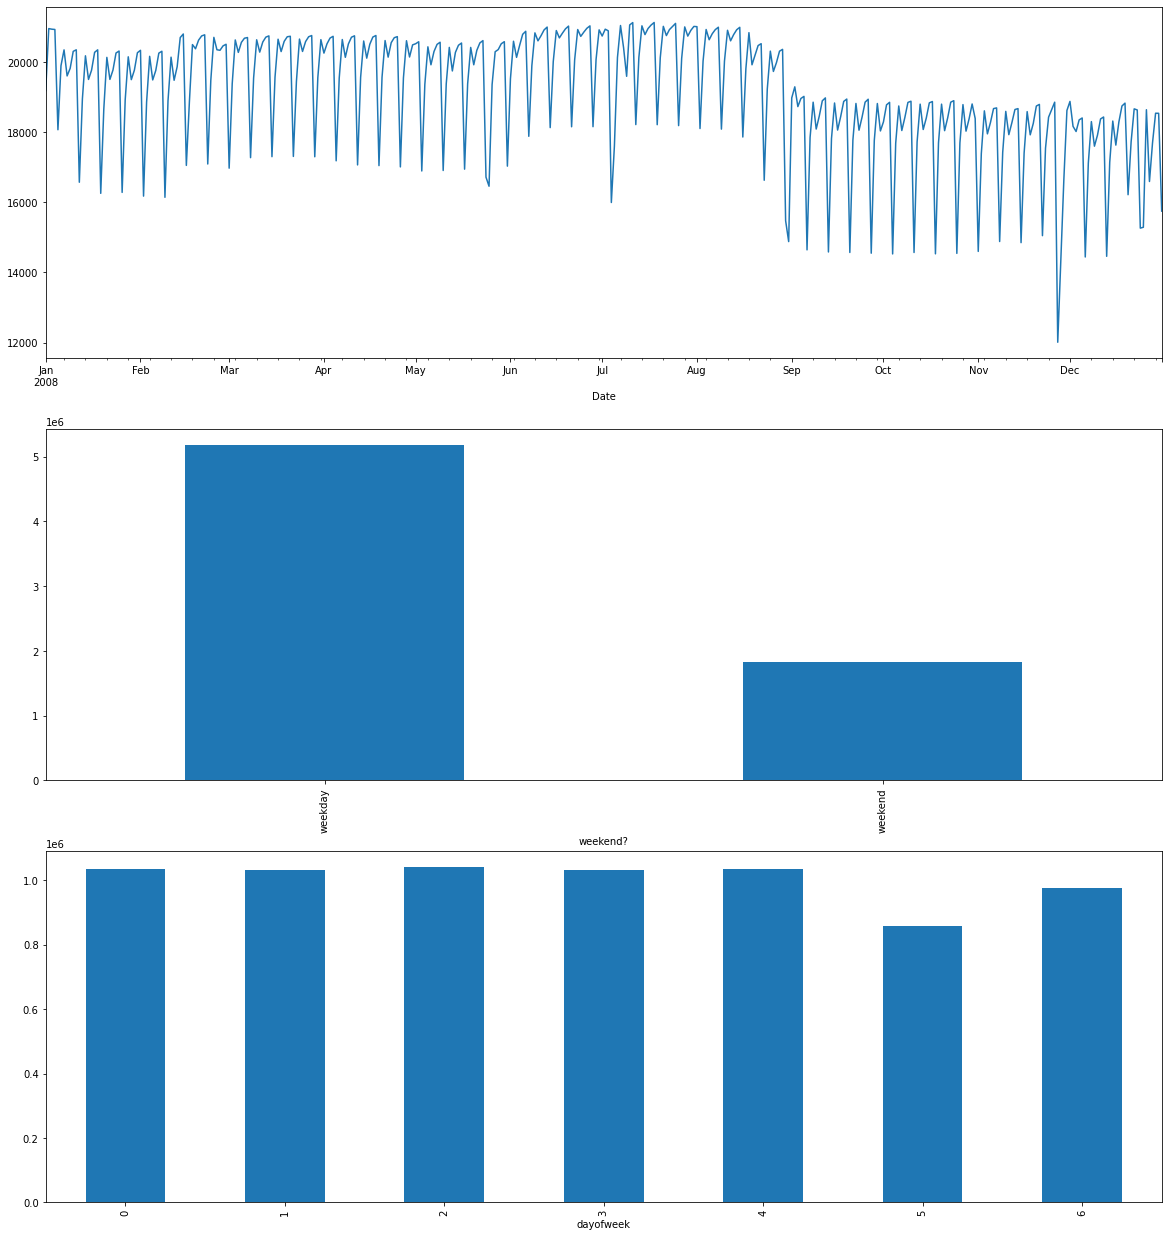

In [199]:
# You code here
# flights_df.head()
"""
INTERPRETATON: STRONG WEEKLY SEASONALITY : high on weekdays, lowest on Saturday
Number of flights in weekends is less than weekdays: True
Lowest Number of flights on Sunday: False : It's Saturday

"""
dailydf=flights_df.groupby("Date").size().reset_index().rename(columns={0:"count"})

weekends=[5,6]# Saturday Sunday
dailydf.loc[dailydf.Date.dt.dayofweek.isin(weekends),"weekend?"]=1
dailydf.loc[~(dailydf.Date.dt.dayofweek.isin(weekends)),"weekend?"]=0
dailydf["dayofweek"]=dailydf["Date"].dt.dayofweek
dailydf.head()

fig=plt.figure(figsize=(20,22))
ax1=fig.add_subplot(311)

dailydf.set_index("Date")["count"].plot(ax=ax1)

ax2=fig.add_subplot(312)
dailydf["weekend?"]=dailydf["weekend?"].map({0:"weekday",1:"weekend"})
dailydf.groupby("weekend?")["count"].sum().plot(kind='bar',ax=ax2)


ax3=fig.add_subplot(313)
dailydf.groupby("dayofweek")["count"].sum().plot(kind='bar',ax=ax3)

dailydf.groupby("dayofweek")["count"].sum()

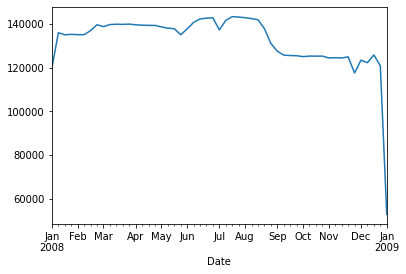

In [208]:
# flights_df.groupby("Date").size().resample("W").sum().plot()
dailydf.set_index("Date").resample("W")["count"].sum().plot()

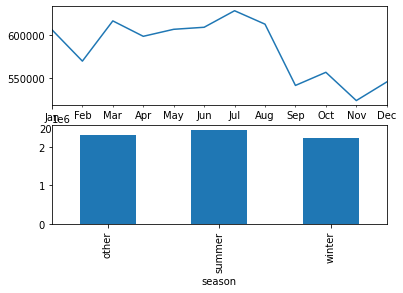

In [216]:
'''
SUMMER HAS MORE FLIGHTS
number of flights peak in summer and drops off during winter
'''

summer=[5,6,7,8]
winter=[11,12,1,2]
dailydf.loc[dailydf["Date"].dt.month.isin(summer),"season"]="summer"
dailydf.loc[dailydf["Date"].dt.month.isin(winter),"season"]="winter"
dailydf.loc[dailydf["season"].isnull(),"season"]="other"
fig=plt.figure()
ax1=fig.add_subplot(211)
dailydf.set_index("Date").resample("M")["count"].sum().plot(kind='line',ax=ax1)
ax2=fig.add_subplot(212)
dailydf.groupby("season")["count"].sum().plot(kind='bar',ax=ax2)


**7. Examine the distribution of cancellation reasons with time. Make a bar plot of cancellation reasons aggregated by months.**

**Choose all correct statements:**
- December has the highest rate of cancellations due to weather. 
- The highest rate of cancellations in September is due to Security reasons.
- April's top cancellation reason is carriers.
- Flights cancellations due to National Air System are more frequent than those due to carriers.

CancellationReason,Carrier,National Air System,Security,Weather
Date,,,,
2008-01-31,6635.0,3962.0,0.0,6711.0
2008-02-29,6090.0,4470.0,2.0,10034.0
2008-03-31,6038.0,2621.0,4.0,7520.0
2008-04-30,7312.0,1564.0,0.0,1479.0
2008-05-31,3157.0,1608.0,3.0,1461.0
2008-06-30,4251.0,3232.0,0.0,3448.0
2008-07-31,5292.0,2694.0,0.0,2612.0
2008-08-31,3852.0,2401.0,0.0,3582.0
2008-09-30,2246.0,1188.0,1.0,6478.0


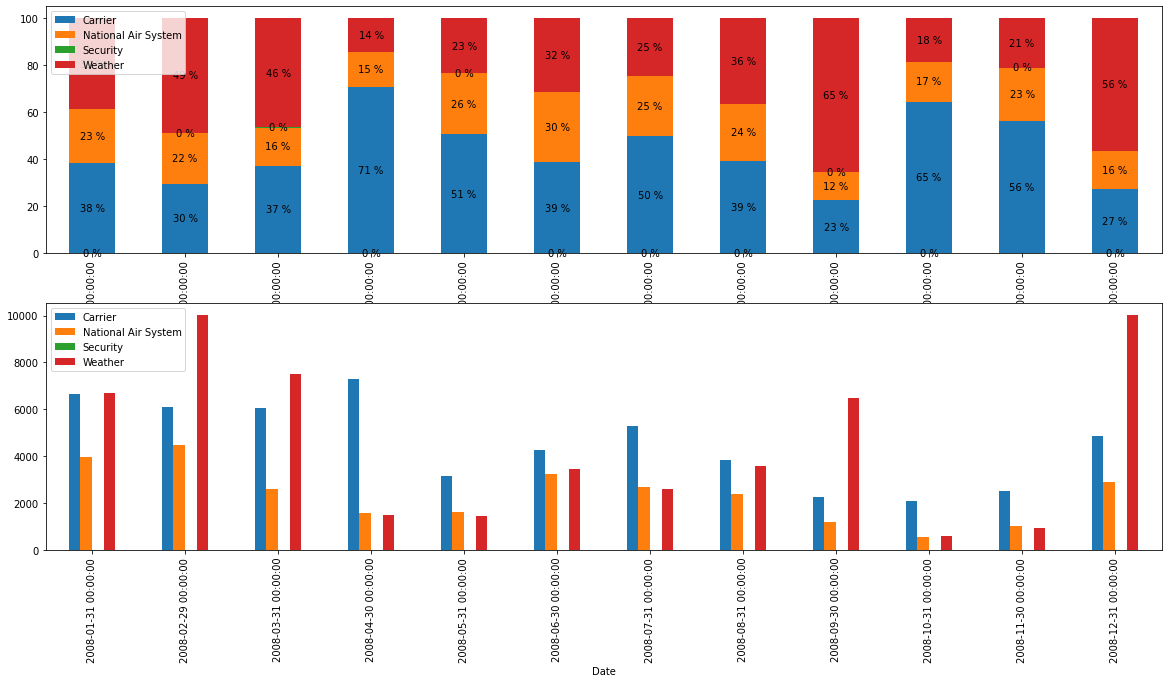

In [242]:
# You code here
'''
December has the highest rate of cancellations due to weather.: True
The highest rate of cancellations in September is due to Security reasons.: False
April's top cancellation reason is carriers.: True
Flights cancellations due to National Air System are more frequent than those due to carriers.: False
'''

fig=plt.figure(figsize=(20,10))
ax1=fig.add_subplot(211)
tdf=flights_df.groupby(["Date","CancellationReason"]).size().unstack().resample("M").sum()
percentage_dist = 100 * tdf.divide(tdf.sum(axis = 1), axis = 0)
percentage_dist.plot.bar(stacked=True,ax=ax1)
for p in ax1.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax1.text(x+width/2, 
            y+height/2, 
            '{:.0f} %'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')


ax1.legend(loc='best')
ax2=fig.add_subplot(212)
tdf.plot.bar(stacked=False,ax=ax2)
ax2.legend(loc='best')
tdf

**8. Which month has the greatest number of cancellations due to Carrier?** 
- May
- January
- September
- April 

In [243]:
# You code here
"""
APRIL
"""
tdf["Carrier"].sort_values(ascending=False).head()

Date
2008-04-30    7312.0
2008-01-31    6635.0
2008-02-29    6090.0
2008-03-31    6038.0
2008-07-31    5292.0
Name: Carrier, dtype: float64

**9. Identify the carrier with the greatest number of cancellations due to carrier in the corresponding month from the previous question.**

- 9E
- EV
- HA
- AA

In [250]:
# You code here
'''
AA
'''
flights_df[flights_df["Month"]==4].groupby("UniqueCarrier")["Cancelled"].sum().sort_values(ascending=False).head()
# flights_df.head()

UniqueCarrier
AA    3918.0
MQ    1007.0
YV     801.0
OO     707.0
UA     682.0
Name: Cancelled, dtype: float64

**10. Examine median arrival and departure delays (in time) by carrier. Which carrier has the lowest median delay time for both arrivals and departures? Leave only non-negative values of delay times ('ArrDelay', 'DepDelay').
[Boxplots](https://seaborn.pydata.org/generated/seaborn.boxplot.html) can be helpful in this exercise, as well as it might be a good idea to remove outliers in order to build nice graphs. You can exclude delay time values higher than a corresponding .95 percentile.**

- EV
- OO
- AA
- AQ 

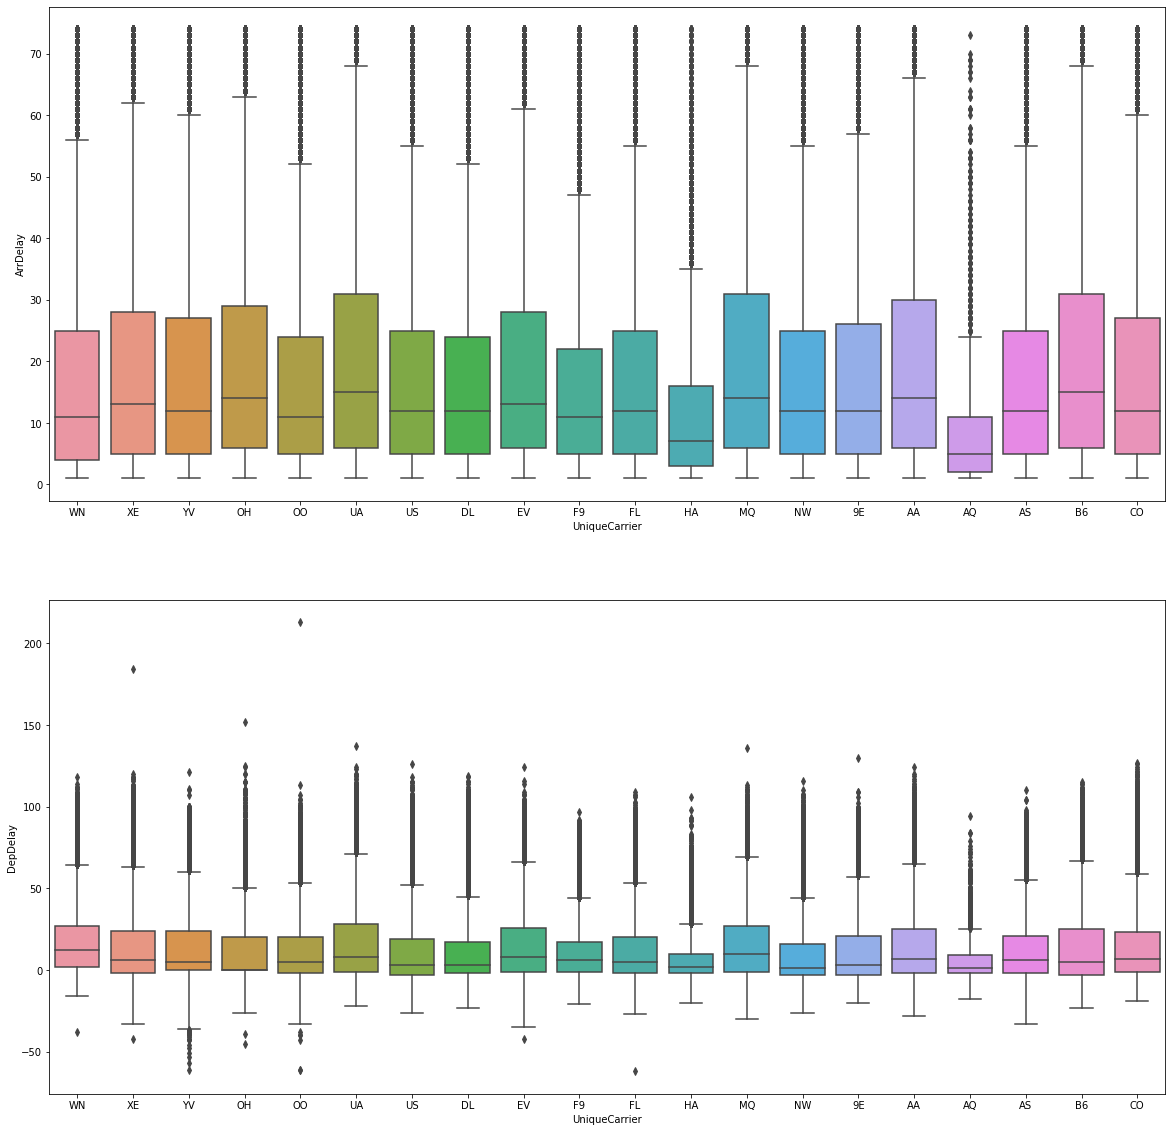

In [278]:
''''
AQ has low ArrDelay and DepDelay
'''


fig=plt.figure(figsize=(20,20))
ax1=fig.add_subplot(211)
ard=flights_df["ArrDelay"]
ardulimit=flights_df["ArrDelay"].quantile(0.95)
ardllimit=0
tdf=flights_df[(flights_df["ArrDelay"]<ardulimit)&(flights_df["ArrDelay"]>ardllimit)]

sns.boxplot(x=tdf["UniqueCarrier"],y=tdf["ArrDelay"],ax=ax1)

dd=flights_df["DepDelay"]
ddulimit=flights_df["DepDelay"].quantile(0.95)
ddllimit=0
tdf2=flights_df[(flights_df["DepDelay"]<ddulimit)&(flights_df["DepDelay"]>ddllimit)]
ax2=fig.add_subplot(212)
sns.boxplot(x=tdf["UniqueCarrier"],y=tdf["DepDelay"],ax=ax2)